# Deep Learning Final Project

Submitted by: Albert Khayat - 212747026, David Afik - 318267721

# Setup

### Imports

In [1]:
import torch

from model.MainModel import Painter
from data import ImagesDataset


### Configurations

In [2]:
print(f"CUDA version: {torch.version.cuda}")

if torch.cuda.is_available():
    device = torch.device('cuda')
    print(f"Name of current CUDA device: {torch.cuda.get_device_name(torch.cuda.current_device())}")
else:
    device = torch.device('cpu')
    print('Running on CPU')

CUDA version: 12.1
Name of current CUDA device: NVIDIA GeForce RTX 3060 Laptop GPU


### Load Data

In [3]:
DATA_PATH = "data\\food"

TRAIN_SIZE = 8000	# 25 * 320
TEST_SIZE = 2000	# 25 * 80

BATCH_SIZE_TRAIN = 16
BATCH_SIZE_TEST = 20

SPLIT_SEED = 1234

# Get dataset
train_data, test_data = ImagesDataset.create_datasets(DATA_PATH, TRAIN_SIZE, TEST_SIZE, seed=SPLIT_SEED, device=device)

train_data.print_stats()
test_data.print_stats()

train_loader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE_TRAIN, shuffle=True, pin_memory=False)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE_TEST, shuffle=True, pin_memory=False)

=====Dataset Stats=====
Food count: 25
Image count: 8000

=====Dataset Stats=====
Food count: 25
Image count: 2000

['hummus', 'falafel', 'waffles', 'steak', 'spring_rolls', 'chocolate_cake', 'churros', 'hamburger', 'ice_cream', 'pizza', 'ramen', 'sashimi', 'sushi', 'pancakes', 'omelette', 'gyoza', 'edamame', 'cheese_plate', 'donuts', 'fish_and_chips', 'french_fries', 'greek_salad', 'paella', 'chicken_curry', 'cup_cakes']


# Train Model

In [4]:
# Training parameters
MODEL_NAME = "testtest"		# Used for save path
PRE_TRAIN = False		# if True, pre-trains generator
LOAD = True			# if True, loads model with model_name before train
LOAD_PRETRAIN = True	# if True, loads pre-train data
SAVE_MODEL = True		# if True, saves model every epoch

PRE_EPOCHS = 0
NUM_EPOCHS = 4

In [5]:
# Create model
model = Painter(MODEL_NAME, load=LOAD, load_pretrain=LOAD_PRETRAIN, device=device).to(device)

n_params_g, n_params_d = model.count_parameters()
print(f"Number of generator parameters: {n_params_g:,}")
print(f"Number of discriminator parameters: {n_params_d:,}")
print(f"Number of parameters: {(n_params_d + n_params_g):,}")

Number of generator parameters: 2,270,754
Number of discriminator parameters: 3,921,697
Number of parameters: 6,192,451


Epoch 1/4


Train:   0%|          | 0/500 [00:00<?, ?it/s]

Test:   0%|          | 0/100 [00:00<?, ?it/s]

Generator test loss: 0.102775


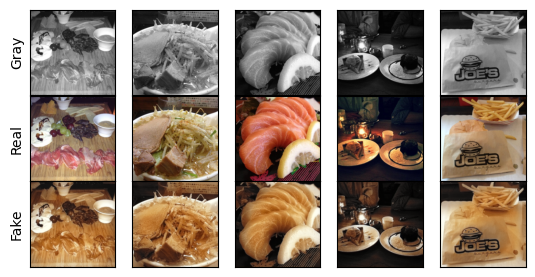

Epoch 2/4


Train:   0%|          | 0/500 [00:00<?, ?it/s]

Test:   0%|          | 0/100 [00:00<?, ?it/s]

Generator test loss: 0.100713


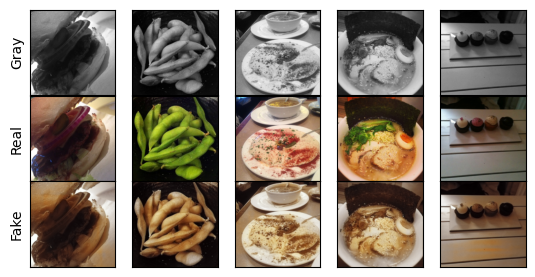

Epoch 3/4


Train:   0%|          | 0/500 [00:00<?, ?it/s]

Test:   0%|          | 0/100 [00:00<?, ?it/s]

Generator test loss: 0.099428


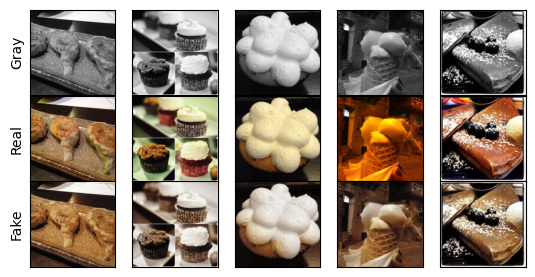

Epoch 4/4


Train:   0%|          | 0/500 [00:00<?, ?it/s]

Test:   0%|          | 0/100 [00:00<?, ?it/s]

Generator test loss: 0.098235


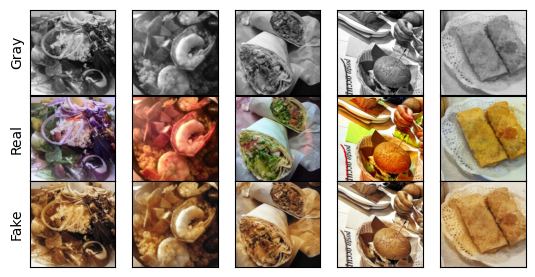

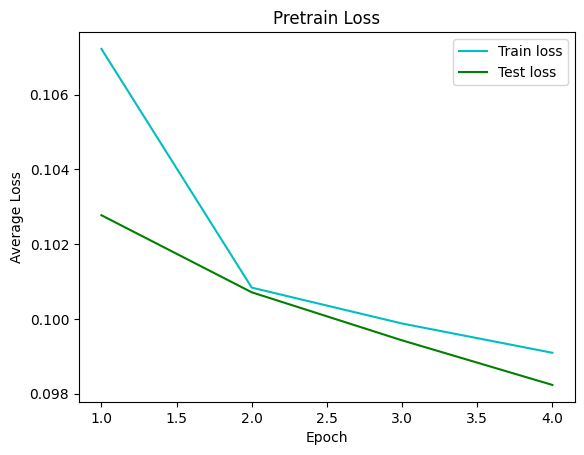

In [6]:
if PRE_TRAIN:
	# Pre-train generator
	for e in range(PRE_EPOCHS):
		print(f"Epoch {model.logger.epochs_pretrained+1}/{PRE_EPOCHS + model.logger.epochs_pretrained - e}")

		train_loss = model.pretrain_generator(train_loader)
		test_loss = model.test_model(test_loader, pretrain=True)
		
		print(f"Generator test loss: {test_loss:.6f}")
		model.logger.plot_coloring()

		model.logger.after_pretrain(train_loss, test_loss)

		if SAVE_MODEL: model.save(pretrain=True)

	model.logger.plot_performence(pretrain=True)

Training epoch 1/4


Train:   0%|          | 0/500 [00:00<?, ?it/s]

Test:   0%|          | 0/100 [00:00<?, ?it/s]

=====Train Losses=====
Discriminator Loss: 0.252069, (Fake=0.128246), (Real=0.123823)
Generator Loss: 0.378515, (GAN=0.107017), (L1=0.271498)
=====Test Losses=====
Discriminator Loss: 4.522222, (Fake=4.234684), (Real=0.287538)
Generator Loss: 0.260829, (GAN=0.017668), (L1=0.243162)


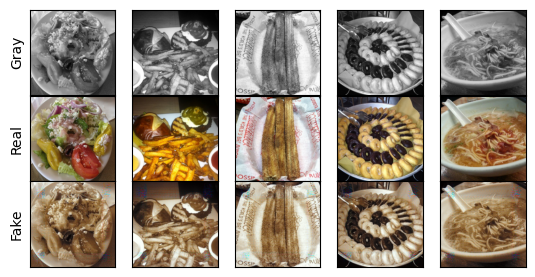

Training epoch 2/4


Train:   0%|          | 0/500 [00:00<?, ?it/s]

Test:   0%|          | 0/100 [00:00<?, ?it/s]

=====Train Losses=====
Discriminator Loss: 0.088508, (Fake=0.045342), (Real=0.043166)
Generator Loss: 0.266952, (GAN=0.020774), (L1=0.246179)
=====Test Losses=====
Discriminator Loss: 4.487443, (Fake=4.235036), (Real=0.252406)
Generator Loss: 0.269655, (GAN=0.017494), (L1=0.252161)


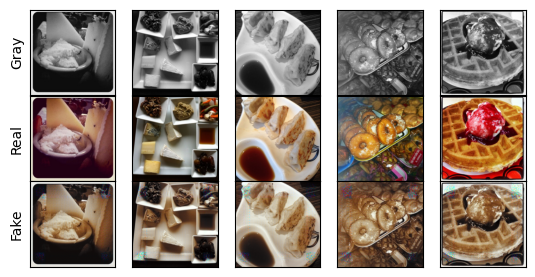

Training epoch 3/4


Train:   0%|          | 0/500 [00:00<?, ?it/s]

Test:   0%|          | 0/100 [00:00<?, ?it/s]

=====Train Losses=====
Discriminator Loss: 0.086629, (Fake=0.044327), (Real=0.042302)
Generator Loss: 0.279085, (GAN=0.029998), (L1=0.249086)
=====Test Losses=====
Discriminator Loss: 3.855834, (Fake=3.699889), (Real=0.155945)
Generator Loss: 0.284561, (GAN=0.030000), (L1=0.254561)


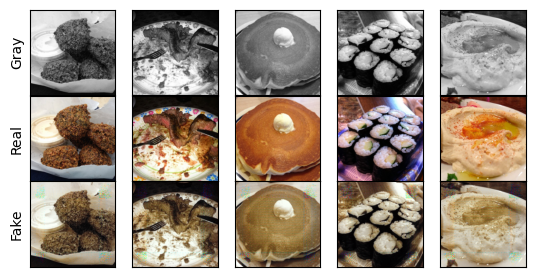

Training epoch 4/4


Train:   0%|          | 0/500 [00:00<?, ?it/s]

Test:   0%|          | 0/100 [00:00<?, ?it/s]

=====Train Losses=====
Discriminator Loss: 0.046607, (Fake=0.026345), (Real=0.020262)
Generator Loss: 0.265135, (GAN=0.024072), (L1=0.241063)
=====Test Losses=====
Discriminator Loss: 4.087927, (Fake=3.979209), (Real=0.108718)
Generator Loss: 0.259417, (GAN=0.022249), (L1=0.237168)


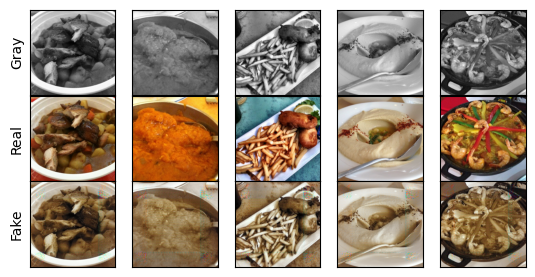

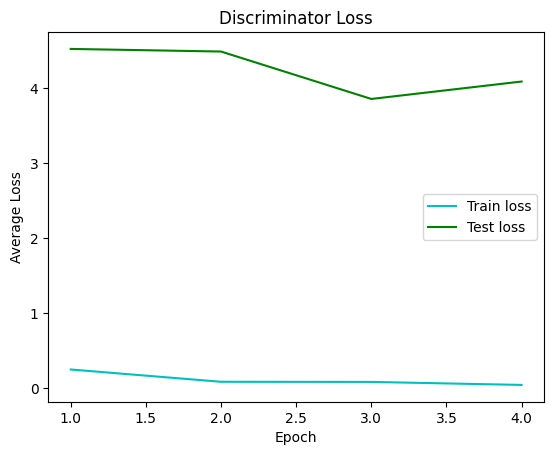

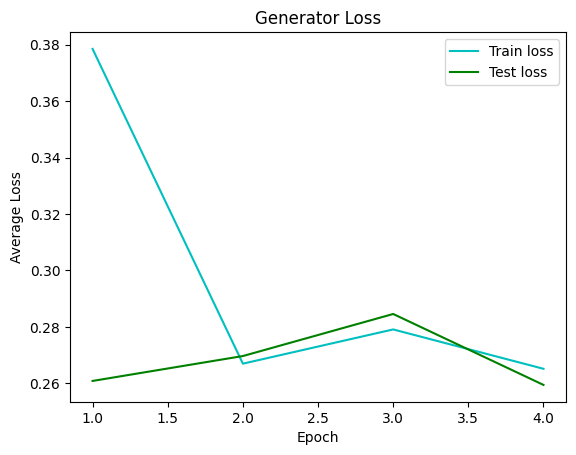

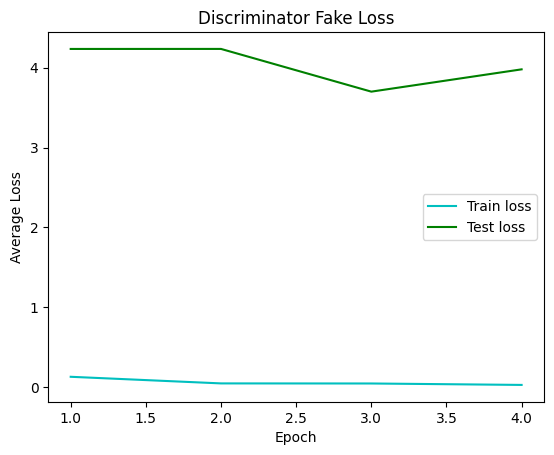

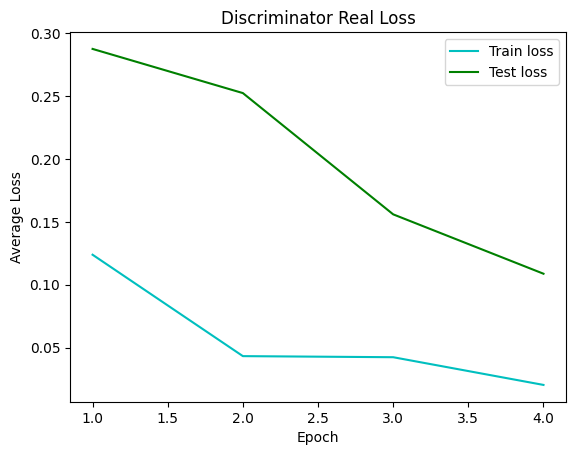

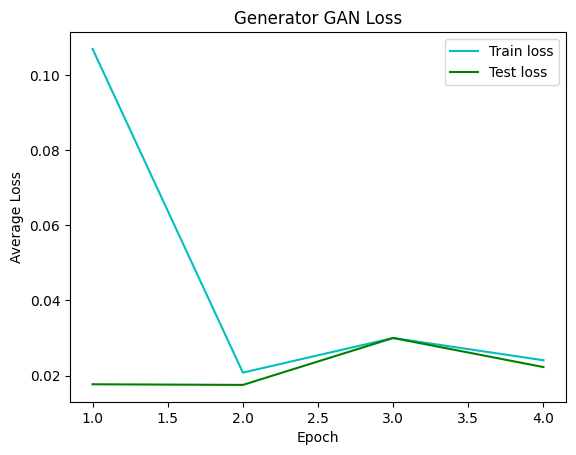

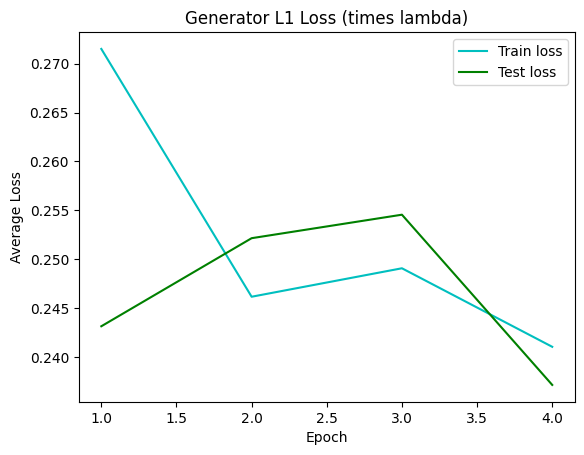

In [6]:
# Train model
for e in range(NUM_EPOCHS):
	print(f"Training epoch {model.logger.epochs_trained+1}/{NUM_EPOCHS + model.logger.epochs_trained - e}")

	model.train_model(train_loader)
	model.test_model(test_loader, log=True)

	# Show loss and coloring after epoch
	model.logger.print_epoch()
	model.logger.plot_coloring()

	if SAVE_MODEL: model.save()

model.logger.plot_performence()

# Test Model

In [ ]:
# If set to None, tests model from the prevous code blocks
model_name = None

if model_name is not None: model = Painter(model_name, load=True, device=device)

In [ ]:
loss_fake, loss_real, gan_loss, l1_loss = model.test_model(test_loader)
model.logger.plot_coloring()